In [ ]:
# Install essential libraries (Colab often has these, but good to ensure correct versions)
!pip install numpy pandas scikit-learn matplotlib seaborn jupyter notebook nltk transformers torch accelerate

# Download NLTK data
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
# nltk.download('vader_lexicon') # Optional
# You might also need this from a previous error:
nltk.download('punkt_tab')
print("NLTK data downloaded!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 119.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 100.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 121.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.4/69.4 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...


NLTK data downloaded!


[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
import pandas as pd
true_news = pd.read_csv('True.csv')
fake_news = pd.read_csv('Fake.csv')
print("Data loaded successfully!")

Data loaded successfully!


In [ ]:
true_news['label'] = 0
fake_news['label'] = 1
df = pd.concat([true_news, fake_news], ignore_index=True)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df['full_text'] = df['title'] + " " + df['text']
print("Data prepared for detector.")
df.head() # Check the combined data

Data prepared for detector.


,title,text,subject,date,label,full_text
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,"Donald Trump s White House is in chaos, and th...",News,"July 21, 2017",1,BREAKING: GOP Chairman Grassley Has Had Enoug...
1,Failed GOP Candidates Remembered In Hilarious...,Now that Donald Trump is the presumptive GOP n...,News,"May 7, 2016",1,Failed GOP Candidates Remembered In Hilarious...
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,Mike Pence is a huge homophobe. He supports ex...,News,"December 3, 2016",1,Mike Pence’s New DC Neighbors Are HILARIOUSLY...
3,California AG pledges to defend birth control ...,SAN FRANCISCO (Reuters) - California Attorney ...,politicsNews,"October 6, 2017",0,California AG pledges to defend birth control ...
4,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,politics,"Apr 25, 2017",1,AZ RANCHERS Living On US-Mexico Border Destroy...


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1mMcSInAue0X1gEOo3eZ3IAmmQDYS6KJu44ddZzAe558/edit#gid=0


APIError: APIError: [400]: Your input contains more than the maximum of 50000 characters in a single cell.

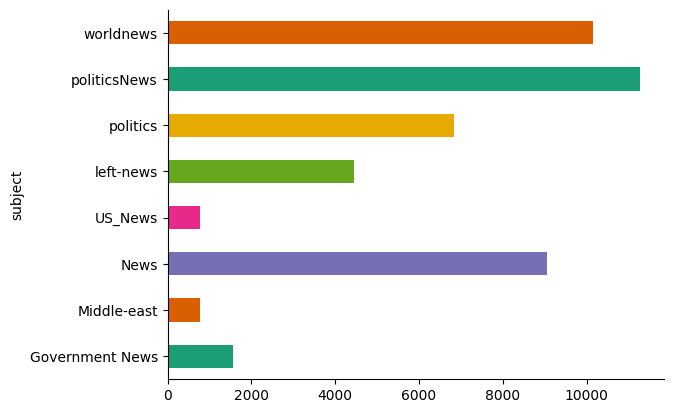

In [ ]:
# @title subject

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('subject').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

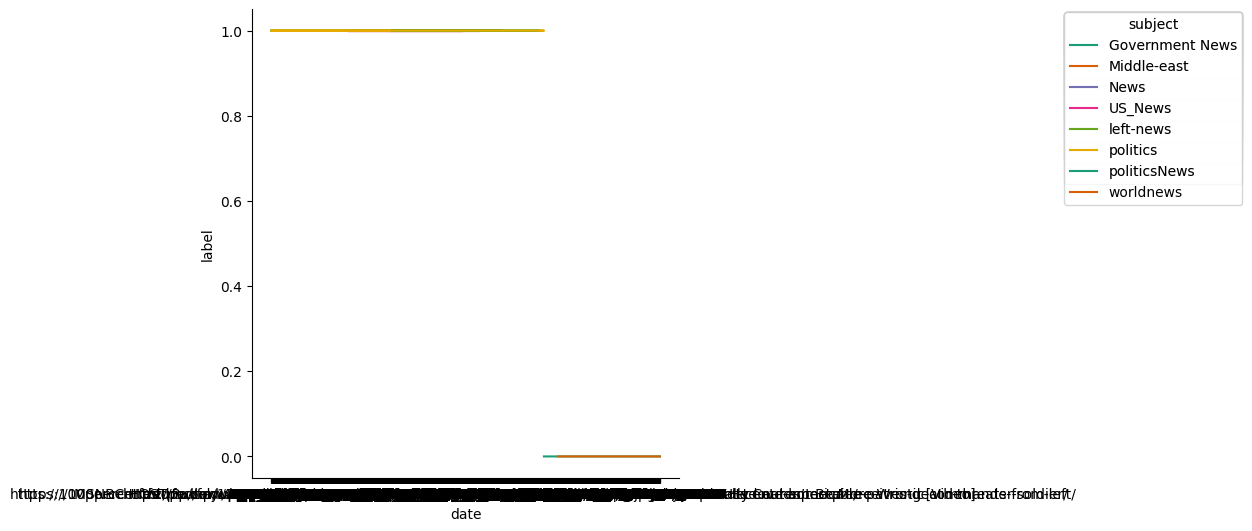

In [ ]:
# @title date vs label

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['label']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('subject')):
  _plot_series(series, series_name, i)
  fig.legend(title='subject', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('label')

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return " ".join(words)

print("Starting text preprocessing... This might still take a few minutes.")
df['processed_text'] = df['full_text'].apply(preprocess_text)
print("Text preprocessing complete!")
print("\nExample of processed text:")
print(df['processed_text'].iloc[0])

Starting text preprocessing... This might still take a few minutes.
Text preprocessing complete!

Example of processed text:
breaking gop chairman grassley enough demand trump jr testimony donald trump white house chaos trying cover russia problem mounting hour refuse acknowledge problem surrounding fake news hoax however fact bear thing differently seems crack congressional public leadershipchuck grassley riowa head senate judiciary committee fed demanding donald trump jr former trump campaign manager paul manafort testify committee regarding infamous shady meeting donald trump shady russian lawyer promised dirt democratic presidential nominee hillary clinton fact information due well demand sends signal team trump notably fire special counsel robert mueller circumstance despite fact seems seems trump white house laying groundwork speak speakhere tweet regarding grassley warningalso anyone think senator grassley rest senate serious need look warning already given trump jr manafort eit

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
print("Converting text to numerical features...")
X = vectorizer.fit_transform(df['processed_text'])
y = df['label']
print("Numerical features created. Shape:", X.shape)

Converting text to numerical features...
Numerical features created. Shape: (44898, 5000)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training the Logistic Regression model...")
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
print("Model training complete!")

predictions = model.predict(X_test)
print("\n--- Detector Model Performance Report ---")
print("Accuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:")
print(classification_report(y_test, predictions))

Training the Logistic Regression model...
Model training complete!

--- Detector Model Performance Report ---
Accuracy: 0.9867483296213808

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4311
           1       0.99      0.98      0.99      4669

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [ ]:
def predict_news_type(news_text):
    processed_text = preprocess_text(news_text)
    vectorized_text = vectorizer.transform([processed_text])
    prediction = model.predict(vectorized_text)[0]
    if prediction == 1:
        return "FAKE NEWS!"
    else:
        return "REAL NEWS!"

print("\n--- Manual Detector Tests ---")
print(f"Text: 'Scientists discover cure for common cold.' -> {predict_news_type('Scientists discover cure for common cold.')}")
print(f"Text: 'Elvis spotted alive on the moon with aliens.' -> {predict_news_type('Elvis spotted alive on the moon with aliens.')}")
print(f"Text: 'The Prime Minister announced new economic policies today.' -> {predict_news_type('The Prime Minister announced new economic policies today.')}")
print(f"Text: 'Breaking: Dogs can now fly using special anti-gravity collars.' -> {predict_news_type('Breaking: Dogs can now fly using special anti-gravity collars.')}")


--- Manual Detector Tests ---
Text: 'Scientists discover cure for common cold.' -> FAKE NEWS!
Text: 'Elvis spotted alive on the moon with aliens.' -> FAKE NEWS!
Text: 'The Prime Minister announced new economic policies today.' -> FAKE NEWS!
Text: 'Breaking: Dogs can now fly using special anti-gravity collars.' -> FAKE NEWS!


In [ ]:
# Combine all fake news text into one long string
all_fake_news_text = " ".join(fake_news['text'].tolist())

# Save this to a temporary text file that the generator can read
# Colab's default path is /content/
with open('/content/fake_news_for_generator.txt', 'w', encoding='utf-8') as f:
    f.write(all_fake_news_text)
print("Fake news text prepared for generator.")

Fake news text prepared for generator.


In [ ]:
from transformers import GPT2Tokenizer, TextDataset, DataCollatorForLanguageModeling
from transformers import Trainer, TrainingArguments, GPT2LMHeadModel, pipeline
import torch

# Load the GPT-2 tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
tokenizer.pad_token = tokenizer.eos_token

# Create a dataset for training from your text file
train_dataset = TextDataset(
    tokenizer=tokenizer,
    file_path="/content/fake_news_for_generator.txt", # Use /content/ path in Colab
    block_size=128
)

data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer, mlm=False
)

# Load the base GPT-2 model
model_gen = GPT2LMHeadModel.from_pretrained('gpt2')

# Ensure model is on GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# For Apple Silicon Macs using MPS (though not relevant for your Asus laptop, good general practice)
if hasattr(torch.backends, 'mps') and torch.backends.mps.is_available():
    device = torch.device("mps")
model_gen.to(device)
print(f"Generator model moved to device: {device}")

# Define training settings for the Trainer
# IMPORTANT: report_to="none" disables the Weights & Biases prompt
training_args = TrainingArguments(
    output_dir='./generator_finetuned', # Directory to save the fine-tuned model
    overwrite_output_dir=True,
    num_train_epochs=1, # Start with 1 epoch for the deadline. Can increase later.
    per_device_train_batch_size=4, # Adjust based on GPU memory; lower if OOM error
    save_steps=10_000, # How often to save checkpoints
    save_total_limit=2,
    prediction_loss_only=True,
    logging_dir='./logs',
    logging_steps=500, # Log progress every X steps
    report_to="none", # <--- MAKE SURE THIS LINE IS HERE AND UNCOMMENTED!
)

trainer = Trainer(
    model=model_gen,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset,
)

print("\n--- Starting GPT-2 Fine-tuning (Generator) ---")
print("This will show a progress bar and loss values as it trains.")
trainer.train()
print("GPT-2 Fine-tuning complete!")

# Save the fine-tuned model
trainer.save_model('./generator_finetuned')
tokenizer.save_pretrained('./generator_finetuned')
print("Fine-tuned generator model saved in /content/generator_finetuned/")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/data/datasets/language_modeling.py:53: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Generator model moved to device: cuda

--- Starting GPT-2 Fine-tuning (Generator) ---
This will show a progress bar and loss values as it trains.


`loss_type=None` was set in the config but it is unrecognised.Using the default loss: `ForCausalLMLoss`.


Step,Training Loss
500,3.631500
1000,3.550300
1500,3.534000
2000,3.505700
2500,3.487500
3000,3.456500
3500,3.453900
4000,3.448700
4500,3.461400
5000,3.450200


GPT-2 Fine-tuning complete!
Fine-tuned generator model saved in /content/generator_finetuned/


In [ ]:
!ls -l generator_finetuned

total 487568
drwxr-xr-x 2 root root      4096 Jul 27 07:01 checkpoint-20000
drwxr-xr-x 2 root root      4096 Jul 27 07:15 checkpoint-24580
-rw-r--r-- 1 root root       880 Jul 27 07:15 config.json
-rw-r--r-- 1 root root       119 Jul 27 07:15 generation_config.json
-rw-r--r-- 1 root root    456318 Jul 27 07:15 merges.txt
-rw-r--r-- 1 root root 497774208 Jul 27 07:15 model.safetensors
-rw-r--r-- 1 root root       470 Jul 27 07:15 special_tokens_map.json
-rw-r--r-- 1 root root       556 Jul 27 07:15 tokenizer_config.json
-rw-r--r-- 1 root root      5304 Jul 27 07:15 training_args.bin
-rw-r--r-- 1 root root    999186 Jul 27 07:15 vocab.json


In [ ]:
from transformers import pipeline, AutoModelForCausalLM, AutoTokenizer

# Load the fine-tuned model and tokenizer
model_path = './generator_finetuned' # Or wherever you saved it
loaded_tokenizer = AutoTokenizer.from_pretrained(model_path)
loaded_model = AutoModelForCausalLM.from_pretrained(model_path)

# You can then use it for generation
generator = pipeline('text-generation', model=loaded_model, tokenizer=loaded_tokenizer)

# Example: Generate some text
prompt = "Once upon a time, in a land far, far away,"
generated_text = generator(prompt, max_length=100, num_return_sequences=1)
print(generated_text[0]['generated_text'])

Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Both `max_new_tokens` (=256) and `max_length`(=100) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Once upon a time, in a land far, far away, where there is a great deal of diversity, there was a time when the black community was in a place where everybody was black and white, and they were treated like second class citizens,  he said.  Now it s the same thing, everybody is different, whether it s white or black. He said the only way to improve the black community is to stop treating them like second class citizens and bring them into the country.  He added:  You have to stop treating the black community like second class citizens.  The NAACP is calling for a boycott of the convention because it s  racist. The RNC plans to hold a convention on Dec. 21 in Cleveland.Featured image via Flickr The GOP s nominee for president who is currently at the center of an ongoing political firestorm for his racist, xenophobic, anti-Semitic and anti-LGBT remarks, Donald Trump, has been accused by many of sexually assaulting people in the past.One of the accusers, New York City City Councilwoman Roc

In [ ]:
from huggingface_hub import notebook_login
notebook_login() # Paste your copied token here when prompted

In [ ]:
repo_name = "harshitdubey00/fake_real_news_project"
loaded_tokenizer.push_to_hub(repo_name)
loaded_model.push_to_hub(repo_name)

README.md: 0.00B [00:00, ?B/s]

Uploading...:   0%|          | 0.00/498M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/harshitdubey00/fake_real_news_project/commit/bbf3e8b5573fc87f70457968bb6bac1005fc5ac7', commit_message='Upload model', commit_description='', oid='bbf3e8b5573fc87f70457968bb6bac1005fc5ac7', pr_url=None, repo_url=RepoUrl('https://huggingface.co/harshitdubey00/fake_real_news_project', endpoint='https://huggingface.co', repo_type='model', repo_id='harshitdubey00/fake_real_news_project'), pr_revision=None, pr_num=None)

In [1]:
from transformers import pipeline

model_id = "harshitdubey00/fake_real_news_project"
generator = pipeline("text-generation", model=model_id)

# Example usage:
prompt = "The latest news headline stated that"
generated_text = generator(prompt, max_length=150, num_return_sequences=1)
print(generated_text[0]['generated_text'])

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/880 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/498M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/119 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/556 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/583 [00:00<?, ?B/s]

Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Both `max_new_tokens` (=256) and `max_length`(=150) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


The latest news headline stated that the Obama administration s first major military deployment was in Yemen, and then, just hours later, that it was in the Middle East. The new headlines were even more ridiculous:  Obama s Firing of Yemen-Hijab Force The Obama administration s first major military deployment was in Yemen. Then it was in the Middle East. In fact, the Pentagon said it would keep the deployment in place for a year, to increase the number of troops and weapons available to help the Yemeni forces fight Islamic State militants.The Pentagon has said on several occasions that it has been keeping a high level of detail about the operation, and officials have said it is not yet in full operation, although it is believed to be in the second half of the year, according to a Pentagon official.The deployment, which was conducted by U.S. Central Command, is meant to be the first time the Pentagon has deployed a U.S. combat-based strike force in Yemen. Officials told NBC News that th